# Modeling - Panel Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from linearmodels.panel import PanelOLS
import os
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from itertools import product
from linearmodels.panel import PanelOLS
import pickle

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

In [2]:
df_test = pd.read_pickle("feature_engineering_test_dataset.pkl")

display(df_test.head(3))
print("Shape: ", df_test.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,dummy_south_dakota,dummy_tennessee,dummy_texas,dummy_utah,dummy_vermont,dummy_virginia,dummy_washington,dummy_west_virginia,dummy_wisconsin,dummy_wyoming
0,2021-02-09,10001,36.782852,15.779060,7.452131,71.744309,63.479295,31.768168,60.557307,40.272843,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-10,10001,33.319952,12.837715,2.041177,72.171535,65.314007,28.528320,63.845535,38.435611,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-11,10001,36.710308,14.203521,2.125673,68.555617,64.170146,31.020100,64.243291,39.718812,...,0,0,0,0,0,0,0,0,0,0


Shape:  (1560, 105)


In [3]:
with open(current_dir + r"\selected_features_PanelRegression_Experiment_03.pkl", "rb") as f:
    list_features = pickle.load(f)

In [4]:
target_var = 'smoothed_wcovid_vaccinated'

In [5]:
list_all_faeture = list_features.copy()
df_test['constant'] = 1.0

In [6]:
with open(current_dir + r"\PanelRegression_Experiment_03.pkl", "rb") as f:
    best_model = pickle.load(f)

In [7]:
test_preds = best_model.predict(df_test.set_index(['geo_value', 'time_value'])[list_all_faeture])
display(test_preds.head(10))
print("Shape :", test_preds.shape)

predictions
geo_value time_value             
10001     2021-02-09    23.879166
          2021-02-10    22.835870
          2021-02-11    24.461608
          2021-02-12    24.213326
10003     2021-02-09    21.217824
          2021-02-10    20.139749
          2021-02-11    17.687848
          2021-02-12    17.554729
10005     2021-02-09    23.049761
          2021-02-10    26.011268

Shape : (1560, 1)


In [8]:
aligned_y_test = df_test.set_index(['geo_value', 'time_value']).loc[test_preds.index][[target_var]]
display(aligned_y_test.head(10))
print("Shape :", aligned_y_test.shape)

smoothed_wcovid_vaccinated
geo_value time_value                            
10001     2021-02-09                   23.062367
          2021-02-10                   24.843072
          2021-02-11                   22.970572
          2021-02-12                   24.430396
10003     2021-02-09                   19.038024
          2021-02-10                   17.313064
          2021-02-11                   17.974378
          2021-02-12                   18.505835
10005     2021-02-09                   26.483328
          2021-02-10                   25.667340

Shape : (1560, 1)


In [9]:
rmse = root_mean_squared_error(aligned_y_test, test_preds)
print(f"Test RMSE: {rmse:.4f}")

Test RMSE: 1.6326


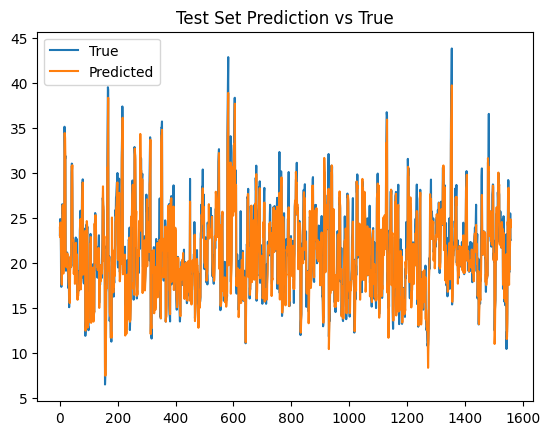

In [10]:
import matplotlib.pyplot as plt

plt.plot(aligned_y_test['smoothed_wcovid_vaccinated'].values, label="True")
plt.plot(test_preds['predictions'].values, label="Predicted")
plt.title("Test Set Prediction vs True")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Residual Distribution')

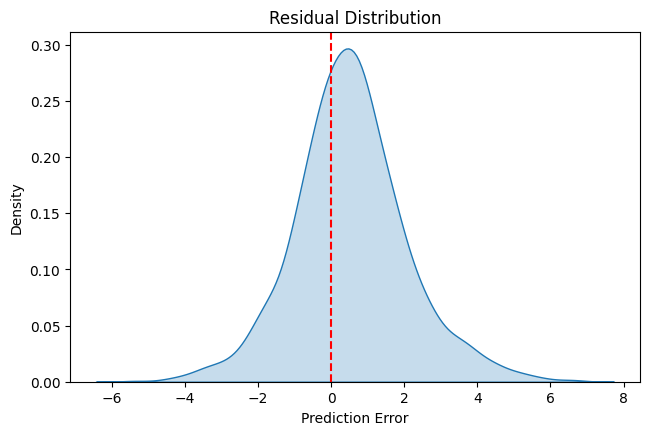

In [11]:
plt.figure(figsize=(25, 10))
plt.subplot(234)
sns.kdeplot(aligned_y_test['smoothed_wcovid_vaccinated'].values - test_preds['predictions'].values, 
            label='Residual', fill=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Residual Distribution')